<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [2]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [4]:
#load the data
csv_file = r'C:\Users\Vinitha\Desktop\IOD\DATA\ais.csv'
ais = pd.read_csv(csv_file)

In [5]:
#head
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [6]:
#types
ais.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [7]:
#find null values
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

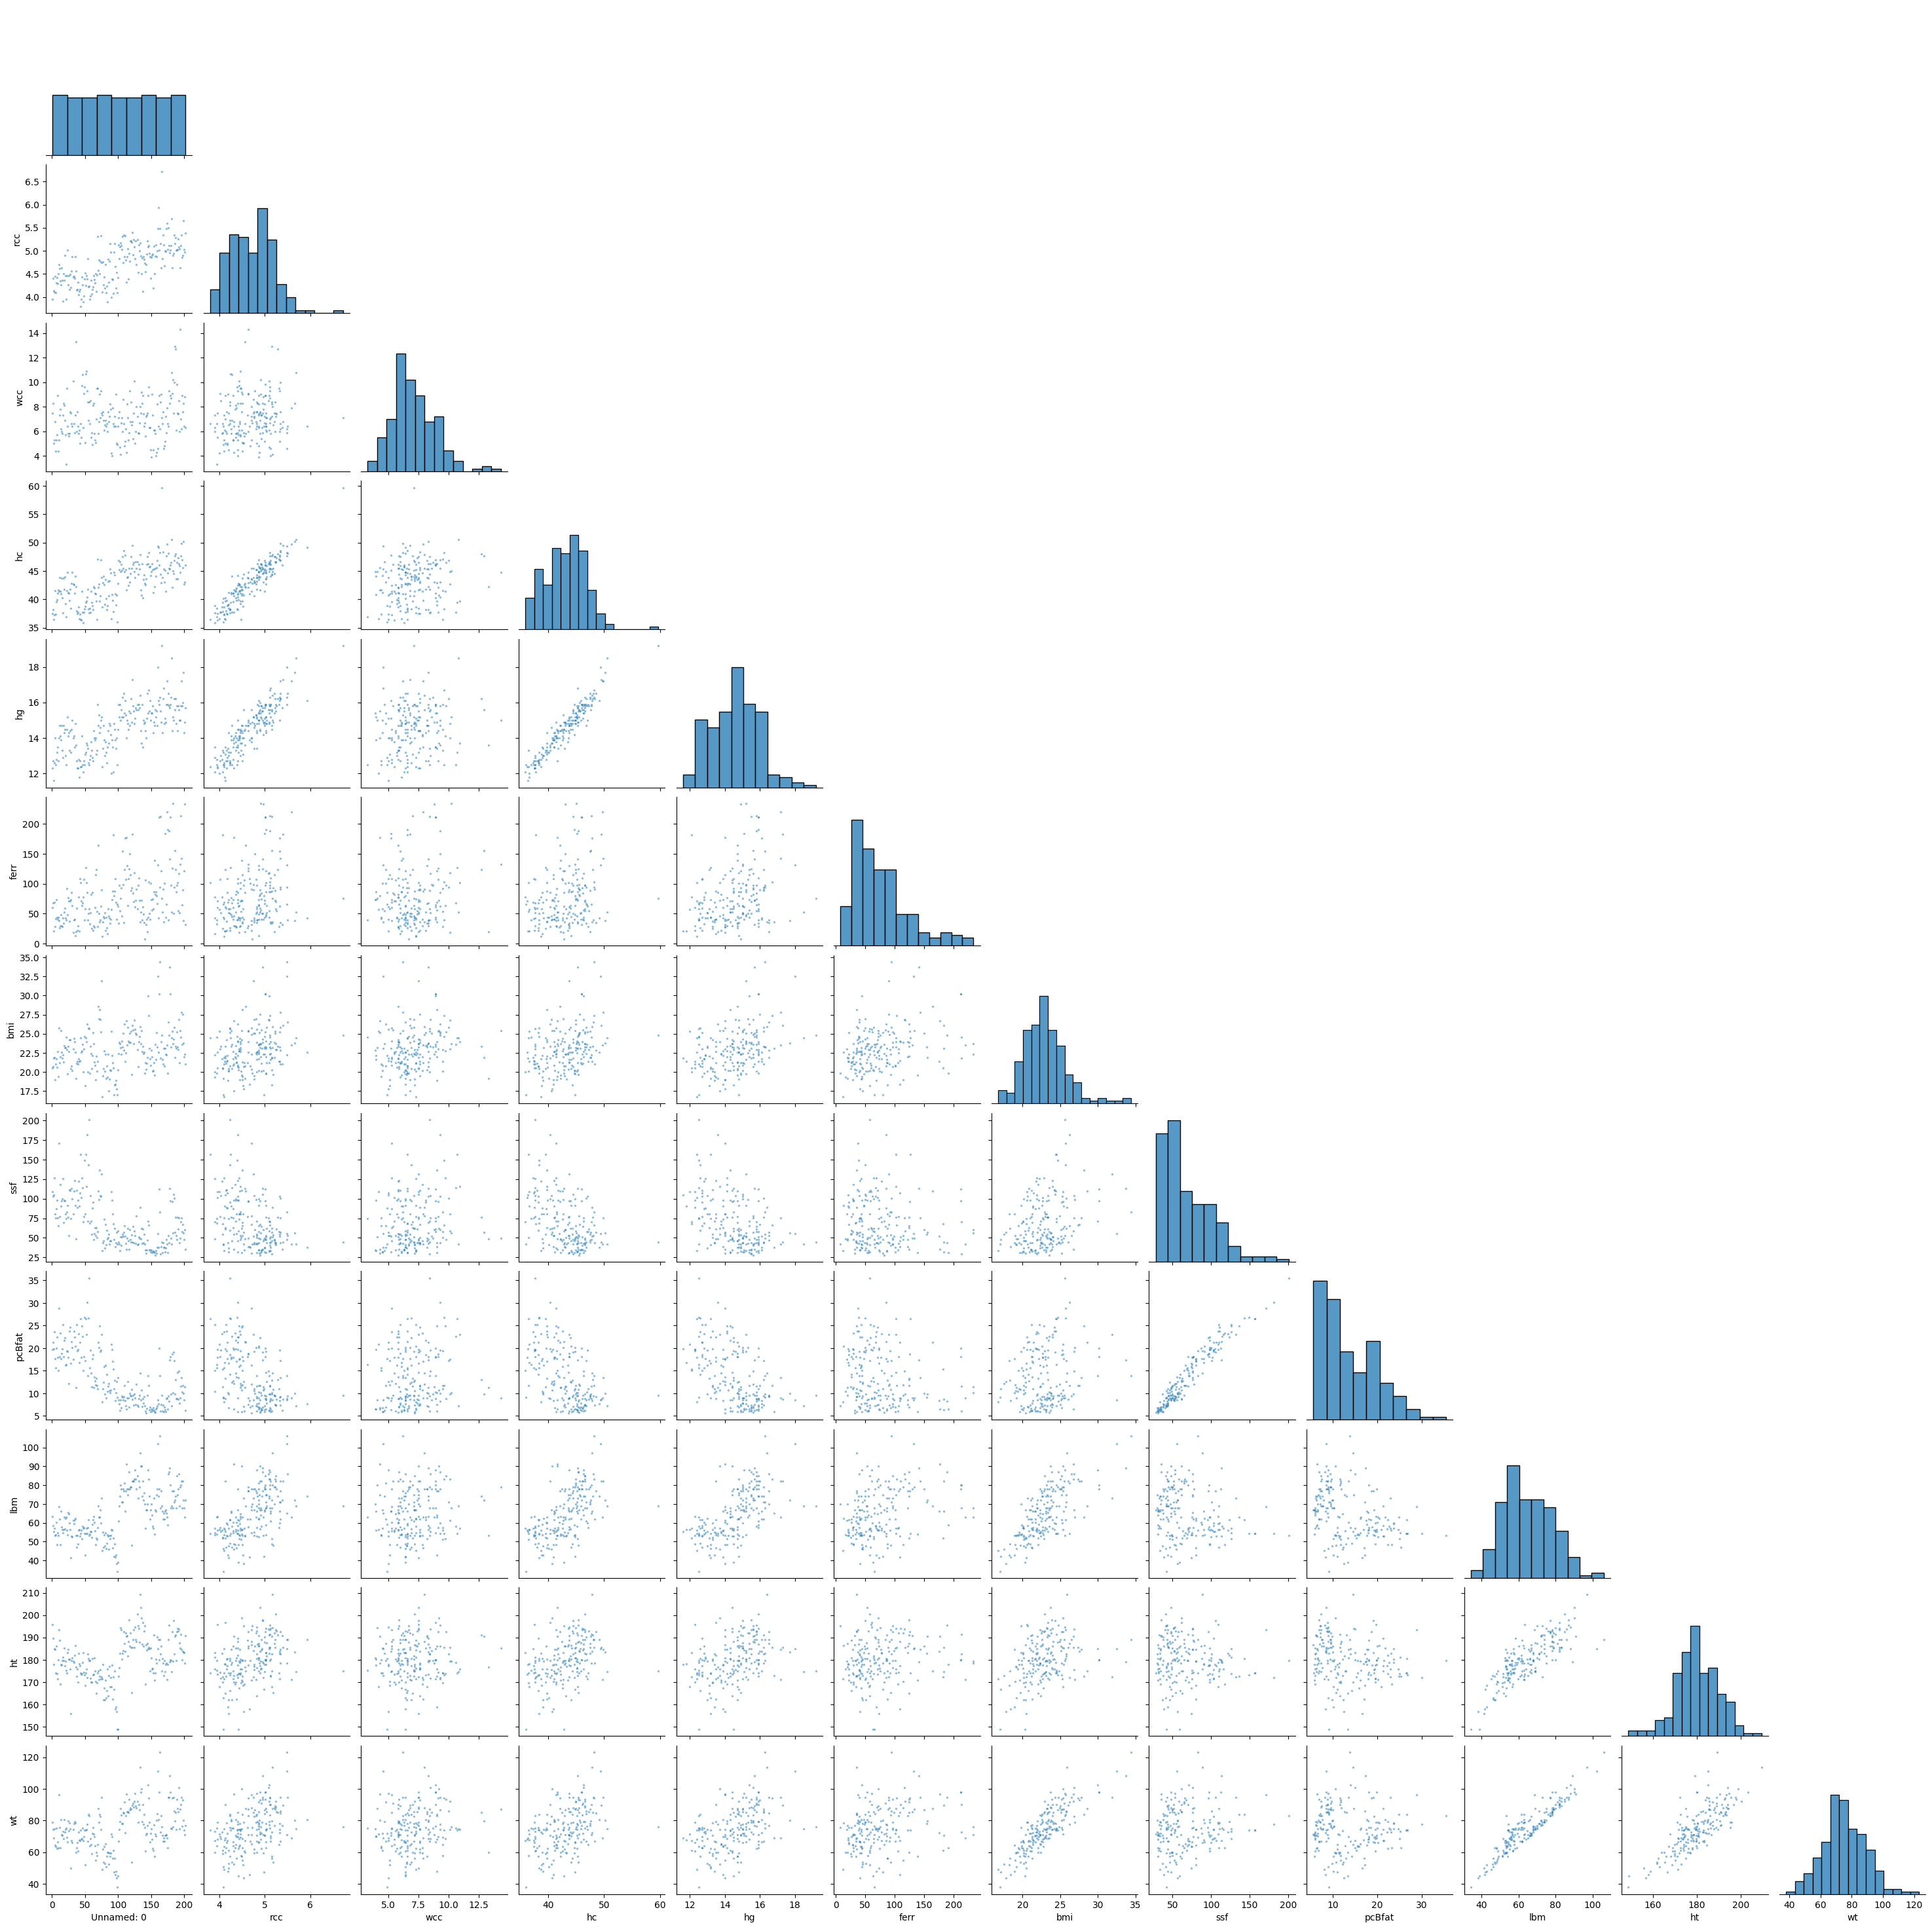

In [8]:
#pairplot
sns.pairplot(ais, plot_kws={'alpha': 0.5, 's': 6}, corner=True)
plt.show()

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [9]:
# ANSWER remove sex and sport
X = ais.drop(['sex', 'sport', 'Unnamed: 0'],axis = 1)
X

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...
197,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
198,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
199,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8
200,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1


In [10]:
from sklearn.preprocessing import StandardScaler
features = ais.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
Xss = scaler.fit_transform(ais[features])

# Convert to DataFrame

In [11]:
Xss

array([[-1.72349742, -1.66056304,  0.21777075, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-1.70634819, -0.67553837,  0.66323597, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.68919896, -1.26655317, -1.17430808, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 1.68919896,  0.68160673, -0.39474394, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 1.70634819,  0.55027011,  0.94165174, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.72349742,  1.44773703, -0.45042709, ...,  0.54658641,
         1.10150699,  0.12181392]])

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [12]:
# ANSWER
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=2, random_state=42)
# Fit the model to your data
kmeans.fit(Xss)

KMeans(n_clusters=2, random_state=42)

### 5. Get the labels for the models using the labels_ attribute.

In [13]:
# ANSWER
labels = kmeans.labels_
print(labels)  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [14]:
# ANSWER
Sum_of_squared_distances =[] #empty list
K= range(1,15) #define a range of k values to test
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

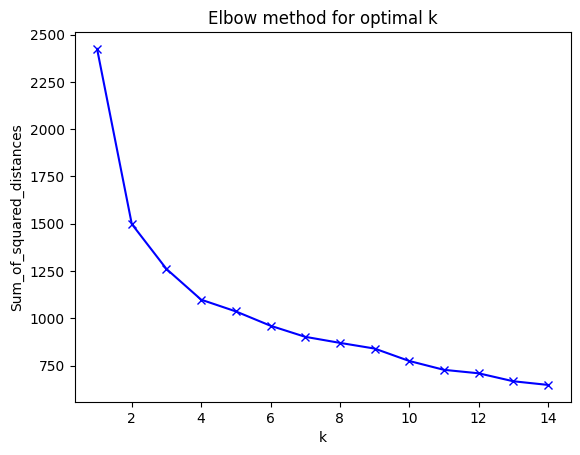

In [15]:
# ANSWER
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

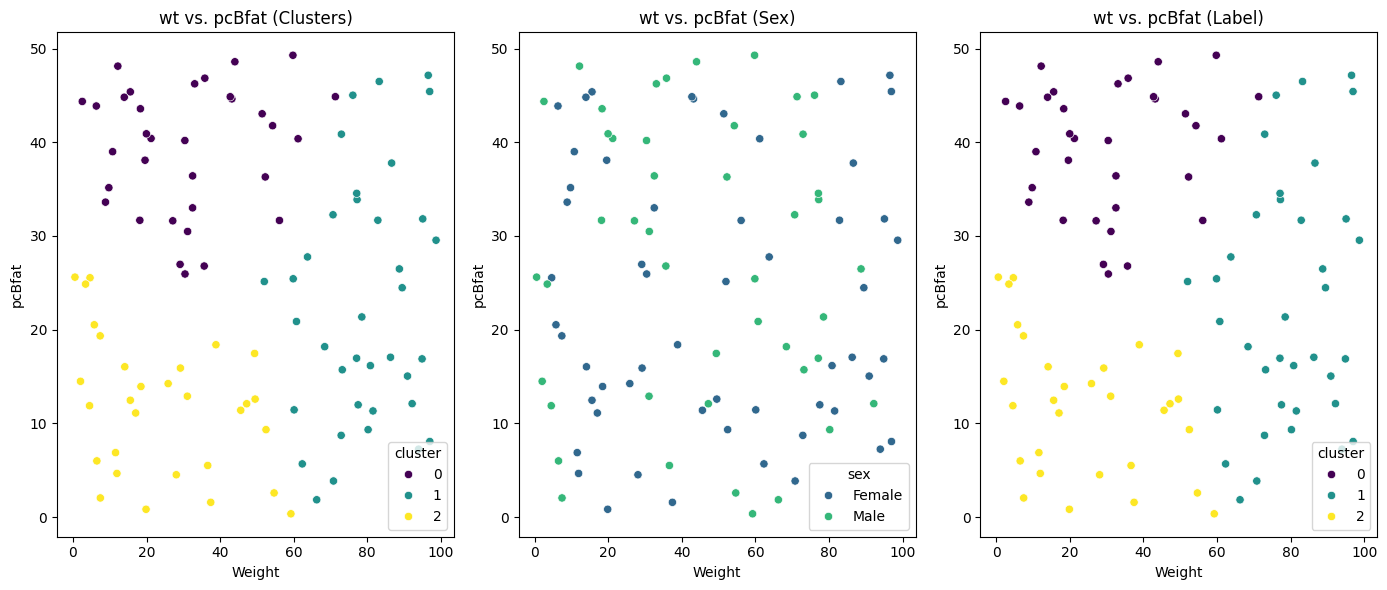

In [17]:
# Plot wt vs. pcBfat using clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='wt', y='pcBfat', hue='cluster', data=df, palette='viridis')
plt.title('wt vs. pcBfat (Clusters)')
plt.xlabel('Weight')
plt.ylabel('pcBfat')

# Plot wt vs. pcBfat using hue 'sex'
plt.subplot(1, 3, 2)
sns.scatterplot(x='wt', y='pcBfat', hue='sex', data=df, palette='viridis')
plt.title('wt vs. pcBfat (Sex)')
plt.xlabel('Weight')
plt.ylabel('pcBfat')

# Plot wt vs. pcBfat using hue 'label'
# If 'label' refers to clusters, it's already included as 'cluster'
plt.subplot(1, 3, 3)
sns.scatterplot(x='wt', y='pcBfat', hue='cluster', data=df, palette='viridis')
plt.title('wt vs. pcBfat (Label)')
plt.xlabel('Weight')
plt.ylabel('pcBfat')

plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



